# Optimization Methods MA060002
## Homework 3
By: Darío Slaifstein, PhD-2.

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

## 1. 
In order to prove that the function $h(x)$ is convex we start by evaluating two points $x$ and $y$:
\begin{equation}
h(\alpha x+(1-\alpha)y)=\max\{f(\alpha x+(1-\alpha)y),g(\alpha x+(1-\alpha)y)\}
\end{equation}
with a $\alpha \in [0;1]$

Since $f(x)$ and $g(x)$ are convex, we can take advantage of their linear properties:
\begin{equation}
h(\alpha x+(1-\alpha)y)\leq\max\{\alpha.f(x)+(1-\alpha)f(y),\alpha g(x)+(1-\alpha)g(y)\}
\end{equation}

which can be rewritten as:
\begin{equation}
h(\alpha x+(1-\alpha)y) \leq \alpha \max\{f(x),g(x)\}+(1-\alpha)\max \{f(y),g(y)\}
\end{equation}
\begin{equation}
h(\alpha x+(1-\alpha)y) \leq \alpha h(x)+(1-\alpha)\max h(y)
\end{equation}
Hence, $h(x)$ holds the convex properties of $f(x)$ and $g(x)$.

## 2.

## 3.
We are trying to find the $x$ that minimizes its squared distance to $z$. So we must derive its optimallity conditions which are:
\begin{equation}
\nabla f(z)=0
\end{equation}

\begin{equation}
\nabla^2 f(z) \succ 0
\end{equation}

The zero-gradient comes from:
\begin{equation}
\frac{\partial f}{\partial z}= \frac{1}{m}.\sum_{i=1}^{m} 2(z-x_i)
\end{equation}

\begin{equation}
\frac{\partial f}{\partial z}= 2(\frac{1}{m}\sum_{i=1}^{m}z-\frac{1}{m}\sum_{i=1}^{m}x_i)
\end{equation}

\begin{equation}
\frac{\partial f}{\partial z}= 2(z-\bar{x})
\end{equation}

Which of course, is telling us that the optimal estimator is made with the average of the $x_i$.
For the Hessian we can see that it is always positive since it is 2.

## 4.
In order to select the optimal parameters of the line that minimizes the distance to the samples we will set up the following optimization problem:
\begin{equation}
\min_{a,b} f(a,b)=\frac{1}{m}\sum_{i=1}^{m} (a.x_i+b-y_i)^2
\end{equation}
The gradient of the objective funcion is:
\begin{equation}
\nabla f= (\frac{\partial f}{\partial a},\frac{\partial f}{\partial b})
\end{equation}

\begin{equation}
\frac{\partial f}{\partial a}=\frac{1}{m}\sum_{i=1}^{m} 2(a.x_i+b-y_i)x_i
\end{equation}
\begin{equation}
\frac{\partial f}{\partial b}=\frac{1}{m}\sum_{i=1}^{m} 2(a.x_i+b-y_i)
\end{equation}

Minimizing in the $b$ coordinate we get
\begin{equation}
\frac{\partial f}{\partial b}=0
\end{equation}
\begin{equation}
\frac{1}{m}\sum_{i=1}^{m} 2(a.x_i+b-y_i)=0
\end{equation}
\begin{equation}
2.(a.\frac{1}{m}\sum_{i=1}^{m}x_i+b-\frac{1}{m}\sum_{i=1}^{m}y_i)=0
\end{equation}

\begin{equation}
a.\bar{x_i}+b-\bar{y_i}=0
\end{equation}
\begin{equation}
\boxed{b=\bar{y_i}-a.\bar{x_i}}
\end{equation}

For the $a$ coordinate:
\begin{equation}
\frac{\partial f}{\partial a}=0
\end{equation}
\begin{equation}
\frac{1}{m}\sum_{i=1}^{m} 2(a.x_i+b-y_i)x_i=0
\end{equation}
\begin{equation}
\frac{1}{m}\sum_{i=1}^{m} 2(a.x_i+ \bar{y_i}-a.\bar{x_i} -y_i)x_i=0
\end{equation}

\begin{equation}
 2(a.\frac{1}{m}\sum_{i=1}^{m}x_i(x_i-\bar{x_i}) +\frac{1}{m}\sum_{i=1}^{m}x_i(\bar{y_i} -y_i))=0
\end{equation}

Which seems to be pretty obscure but in fact, if we clear out $a$:
\begin{equation}
a.\frac{1}{m}\sum_{i=1}^{m}x_i(x_i-\bar{x_i})=-\frac{1}{m}\sum_{i=1}^{m}x_i(\bar{y_i} -y_i))
\end{equation}
\begin{equation}
\boxed{a=\frac{\sum_{i=1}^{m}x_i(y_i-\bar{y_i}))}{\sum_{i=1}^{m}x_i(x_i-\bar{x_i})}}
\end{equation}
Finally we have the optimal $a$ and $b$ in terms of the samples $x_i$.

## 5.
Our problem is:
\begin{equation}
\min f(x)=2x_1^4+3x_2^4+2x_1^2+4x_2^2+x_1x_2-3x_1-2x_2
\end{equation}
which we can visualize in the following plots.

In [2]:
def obj_func(xk): # Function for Q.5.
    x1, x2 = xk   
    return 2*x1**4+3*x2**4+2*x1**2+4*x2**2+x1*x2-3*x1-2*x2;
def obj_grad(xk): # its gradient
    x1, x2 = xk    
    return np.array([8*x1**3+4*x1+x2-3, 12*x2**3+8*x2+x1-2]);

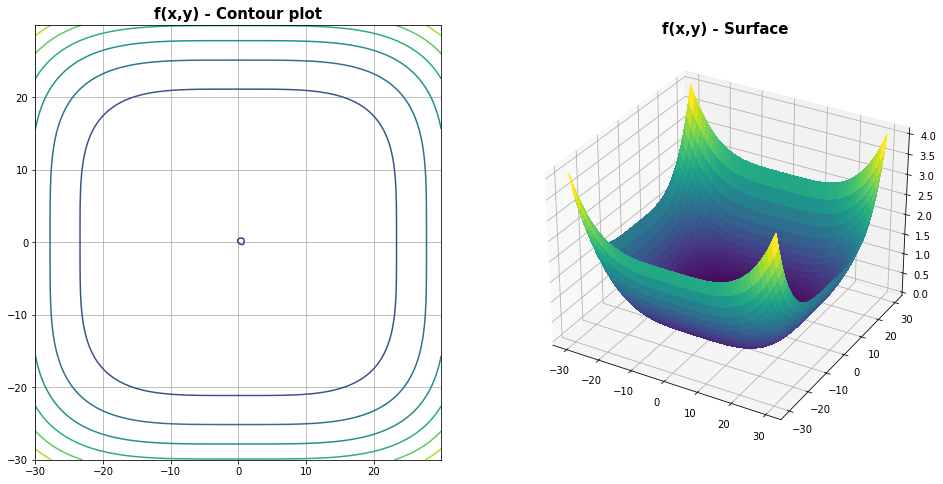

In [3]:
dx=0.01
x=np.arange(-30,30,dx) # x array for grid
y=np.arange(-30,30,dx) # y array for grid
X, Y = np.meshgrid(x, y) # grid

# Min. function
Z=obj_func([X,Y])

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(16,8))

# =============
# First subplot: contour
# =============
# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1)

# contour plot
ax1.contour(X, Y, Z)
ax1.set_title('f(x,y) - Contour plot',fontweight='bold', fontsize=15)
plt.grid()

# =============
# Second subplot: surface
# =============
# set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)
ax2.set_title('f(x,y) - Surface',fontweight='bold', fontsize=15)
plt.grid()

We define the first-order method with Armijo backtracking:

In [4]:
def armijo(xk, tolerance, alpha, gamma,tk):
    x = [xk]
    k = 1
    error = 1e9
    errors = []
    maxIter=1e3
    while error > tolerance and k<maxIter:
        # Step 1: point and gradient k iter
        xk = x[-1]
        gfk = obj_grad(xk)
        
        # Step 2: pick step size tk
        sw = 1 # switch for Armijo inequality
        ii = 1
        while sw == 1: # break when inequality is reversed
            sw = obj_func(xk - tk*gfk) > (obj_func(xk) - alpha*tk*gfk.T@gfk)
            tk = gamma*tk
        
        # Step 3: update xk
        xk = xk - tk * gfk
        x.append(xk)
        
        # Step 4: error criteria
        error = np.linalg.norm(gfk, ord=2)
        errors.append(error)

        k = k + 1

    return x, k-1, errors;

Following the requirements of the assigment, the function is minimized with the Armijo algo and finally visualized in the contour plot.

In [5]:
x0=np.array([0, 0])
alpha0=0.4
gamma0=0.9
t0=1
tol=1e-3
[x,k,err]=armijo(x0,tol,alpha0,gamma0,t0)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(12,6))

# =============
# First subplot: contour
# =============
# set up the axes for the first plot

# contour plot
plt.contour(X, Y, Z)
plt.grid()

# fRes=f(xRes[:,0],xRes[:,1])
    
# Plot results
legLabel= f'$x_0=[{x0[0]}, {x0[1]}]$'
plt.plot(np.array(x)[:,0],np.array(x)[:,1],'-o',label=legLabel)
plt.legend(fontsize=15)
plt.xlim(-0.25, 1); plt.ylim(-1, 1);
plt.title(fr'$\alpha={alpha0},\ \gamma={gamma0},\ t={t0}$', fontsize=15)
plt.show()

## 6. Competing methods
We will now analyse how does each method handles the following quadratic function minimization:
\begin{equation}
    f=x^T A x
\end{equation}
whose coefficients are:
\begin{equation}
    a_{ij}=\frac{1}{i+j-1}
\end{equation}
In the following cells we will define the different functions necessary for implementation, after that a wrapper script and a final summary of the results.

In [27]:
def obj_func(xk): # Function for Q.6.
    n=5
    A=np.zeros((n, n))
    for i in range(1,n,1):
        for j in range(1,n,1):
            A[i-1][j-1]=1/(i+j-1)
    return xk.T@A@xk, A;

def obj_grad(xk): # its gradient
    return A@xk;

In [100]:
def cstStep (xk, maxIter=50, tol=1e-3):
    # Initial values
    x = [xk] # append the first value
    
    # Calculate step size outside of the loop for efficiency
    L = np.linalg.norm(obj_grad(xk), ord=2) # Lipschitz constant
    alphak = 1/L
        
    # Parameters
    error=1
    errors=[]

    k=1

    while error > tol and k < maxIter: # iterations
        # Step 1: Calculate gradient
        gfk=obj_grad(xk)

        # Step 2: calculate x for k+1
        xk = xk - alphak * gfk  # x^k+1
        x.append(xk)
        
        # Step 3: convergence
        error = np.linalg.norm(gfk, ord=2) # ||\nabla f||2 = 0
        errors.append(error)
        # next iteration
        k=k+1

    return x,k-1,errors;

In [99]:
def armijo(xk,alpha,gamma,tk, maxIter=50, tol=1e-3):
    x = [xk]
    k = 1
    error = 1e9
    errors = []

    while error > tol and k < maxIter:
        # Step 1: point and gradient k iter
        xk = x[-1]
        gfk = obj_grad(xk)
        
        # Step 2: pick step size tk
        sw = 1 # switch for Armijo inequality
        ii = 1
        while sw == 1: # break when inequality is reversed
            sw = obj_func(xk - tk*gfk)[0] > (obj_func(xk)[0] - alpha*tk*gfk.T@gfk)
            tk = gamma*tk
        
        # Step 3: update xk
        xk = xk - tk * gfk
        x.append(xk)
        
        # Step 4: error criteria
        error = np.linalg.norm(gfk, ord=2)
        errors.append(error)

        k = k + 1

    return x, k-1, errors;

In [98]:
def steepestDescent(xk, maxIter=50, tol=1e-3): # main function
    # Initial values
    x=[xk] # append the first value
    alpha=[]
    A = obj_func(xk)[1]
    
    # Parameters
    error=1
    errors=[]
    k=1

    while error > tol and k < maxIter: # iterations
        # Step 1: Calculate gradient
        gfk=obj_grad(xk)
        
        # Step 2: optimum alpha
        # Steepest descent
        alphak = (gfk.T@gfk)/(A.T@gfk.T@gfk) 
        alpha.append(alphak)
    
        # Step 3: calculate x for k+1
        xk = xk - alphak * gfk  # x^k+1
        x.append(xk)
        
        # Step 4: convergence
        error = np.linalg.norm(gfk, ord=2) # ||\nabla f||2 = 0
        errors.append(error)
        # next iteration
        k=k+1

    return x,k-1, errors, alpha;

In [120]:
def heavyBall(xk, betak, alphak, maxIter=50, tol=1e-3):
    x = [xk, xk]
    # Lipschitz constant
    L = np.linalg.norm(obj_grad(xk), ord=2) 
    
    k = 1
    error = 1e9
    errors = []
    while error > tolerance and k < maxIter:
        # Step 1: pick k and k-1
        xk = x[-1]
        _xk = x[-2]

        # Step 2: update gradient, alpha and beta
        gfk = obj_grad(xk)
        alpha = alphak * 2 * (1 + betak) / L
        beta = betak

        # Step 3: update x k+1
        xk = xk - alpha * gfk + beta * (xk - _xk)
        x.append(xk)

        # Step 4: convergence
        error = np.linalg.norm(gfk, ord=2)
        errors.append(error)

        k = k + 1

    return x, k - 1, errors;

In [96]:
def conjGradient(xk, maxIter=50, tol=1e-3):
    # Initial values
    x=[xk] # append the first value
    A = obj_func(xk)[1]
    # initial descent direction is the gradient
    gfk=obj_grad(xk); pk = -gfk    
    
    # Parameters
    error=1
    errors=[]
    k=1

    while error > tol and k < maxIter: # iterations
        # Step 1: optimum alpha
        alphak = np.linalg.norm(gfk, ord=2)**2/(A.T@pk.T@pk) 
    
        # Step 2: update x for k+1
        xk = xk + alphak * pk  # x[k+1]
        # Update gradient[k+1] 
        gfk = gfk + alphak * A @ pk # g[k+1]
        # update beta[k+1]
        betak = np.linalg.norm(gfk, ord=2)**2/np.linalg.norm(obj_grad(x[-1]), ord=2)**2
        # update descent direction p[k+1]
        pk = -gfk + betak*pk
        # save x[k+1]
        x.append(xk)
        
        # Step 3: convergence
        error = np.linalg.norm(gfk, ord=2) # ||\nabla f||2 = 0
        errors.append(error)
        # next iteration
        k=k+1
    return x, k-1, errors;

In [95]:
def fastGradient(xk, maxIter=50, tol=1e-3):
    x = [xk]
    L = np.linalg.norm(obj_grad(xk), ord=2) 
    vk = xk
    thetak = 1
    tk = 1/L
    
    k = 1
    error = 1
    errors = []
    while error > tol and k<maxIter:
        # Step 1: Get theta
        _thetak = thetak
        for thetak in np.linspace(0.01, 0.99, 100):
            if (1 - thetak) / thetak ** 2 <= 1 / _thetak ** 2:
                break
        # Step 2: update x[k]
        _xk = xk
        y = (1 - thetak) * xk + thetak * vk
        gfk = obj_grad(y)
        xk = y - tk * gfk
        vk = _xk + 1 / thetak * (xk - _xk)
        x.append(xk)

        # Step 3: convergence
        error = np.linalg.norm(gfk, ord=2)
        errors.append(error)
        
        k = k + 1
    return x, k-1, errors;

In [121]:
# Wrapper script
# Constant step size. 
x0 = np.array([1,1,1,1,1])
f0, A = obj_func(x0)
tolerance = 1e-3

x, k, errors = cstStep (x0)

results=pd.DataFrame()
results['Method']=['Constant step']
results['k']= k
results['error']= errors[-1]
results['xk']= [x[-1]]

# Smaller step size with inequalities
# Armijo parameters
alpha0=0.4; gamma0=0.9; t0=1;
x, k, errors = armijo(x0,alpha0,gamma0,t0)
results.loc[1]=['Armijo',k,errors[-1],x[-1]]

# Steepest descent
x, k, errors, alphas = steepestDescent(x0)
results.loc[2]=['Steepest Descent',k,errors[-1],x[-1]]

# Heavy ball
beta0=0.3
x, k, errors = heavyBall(x0, beta0, alpha0)
results.loc[3]=['Heavy Ball',k,errors[-1],x[-1]]

# Conjugate gradient
x, k, errors = conjGradient(x0)
results.loc[4]=['Conjugate Gradient',k,errors[-1],x[-1]]

# Fast gradient
x, k, errors = fastGradient(x0)
results.loc[5]=['Fast Gradient',k,errors[-1],x[-1]]

In [122]:
results

,Method,k,error,xk
0,Constant step,49,0.006480,"[0.0066043860728400025, -0.09497738308533482, ..."
1,Armijo,49,0.028360,"[-0.06843669280615983, -0.05331416489280922, 0..."
2,Steepest Descent,46,0.000994,"[0.01925235593826884, -0.07300530352868048, -0..."
3,Heavy Ball,49,0.001497,"[0.02220559612802953, -0.09944311869545455, -0..."
4,Conjugate Gradient,3,0.000002,"[-0.0006517329831243097, 0.007337616563981436,..."
5,Fast Gradient,38,0.000912,"[0.016519644679686085, -0.07011422169175127, -..."
